In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/lamb/1 (103).jpg
/kaggle/input/dataset/lamb/1 (60).jpg
/kaggle/input/dataset/lamb/1 (18).jpg
/kaggle/input/dataset/lamb/1 (4).jpg
/kaggle/input/dataset/lamb/1 (41).jpg
/kaggle/input/dataset/lamb/1 (44).jpg
/kaggle/input/dataset/lamb/1 (49).jpg
/kaggle/input/dataset/lamb/1 (38).jpg
/kaggle/input/dataset/lamb/1 (56).jpg
/kaggle/input/dataset/lamb/1 (19).jpg
/kaggle/input/dataset/lamb/1 (25).jpg
/kaggle/input/dataset/lamb/1 (51).jpg
/kaggle/input/dataset/lamb/1 (28).jpg
/kaggle/input/dataset/lamb/1 (73).jpg
/kaggle/input/dataset/lamb/1 (34).jpg
/kaggle/input/dataset/lamb/1 (47).jpg
/kaggle/input/dataset/lamb/1 (96).jpg
/kaggle/input/dataset/lamb/1 (66).jpg
/kaggle/input/dataset/lamb/1 (6).jpg
/kaggle/input/dataset/lamb/1 (81).jpg
/kaggle/input/dataset/lamb/1 (13).jpg
/kaggle/input/dataset/lamb/1 (88).jpg
/kaggle/input/dataset/lamb/1 (53).jpg
/kaggle/input/dataset/lamb/1 (24).jpg
/kaggle/input/dataset/lamb/1 (1).jpg
/kaggle/input/dataset/lamb/1 (90).jpg
/kaggle/input/

In [41]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [42]:
# Dataset path
DATASET_ROOT = '/kaggle/input/dataset'
IMAGE_SIZE = (128, 128)

In [43]:
# Automatically detect class folders
CLASSES = [folder for folder in os.listdir(DATASET_ROOT) if os.path.isdir(os.path.join(DATASET_ROOT, folder))]

In [44]:
# HOG feature extractor
def extract_hog_features(image):
    features, _ = hog(image,
                      orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      block_norm='L2-Hys',
                      visualize=True)
    return features

In [45]:
# Load and extract HOG features
def load_data():
    X, y = [], []
    for label in CLASSES:
        folder = os.path.join(DATASET_ROOT, label)
        for file in os.listdir(folder):
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(folder, file)
                img = cv2.imread(path)
                img = cv2.resize(img, IMAGE_SIZE)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                features = extract_hog_features(gray)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

In [46]:
# Load data
X, y = load_data()

In [47]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [48]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [49]:
# Train XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
# Predictions
y_pred = model.predict(X_test)

In [54]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=le.classes_)

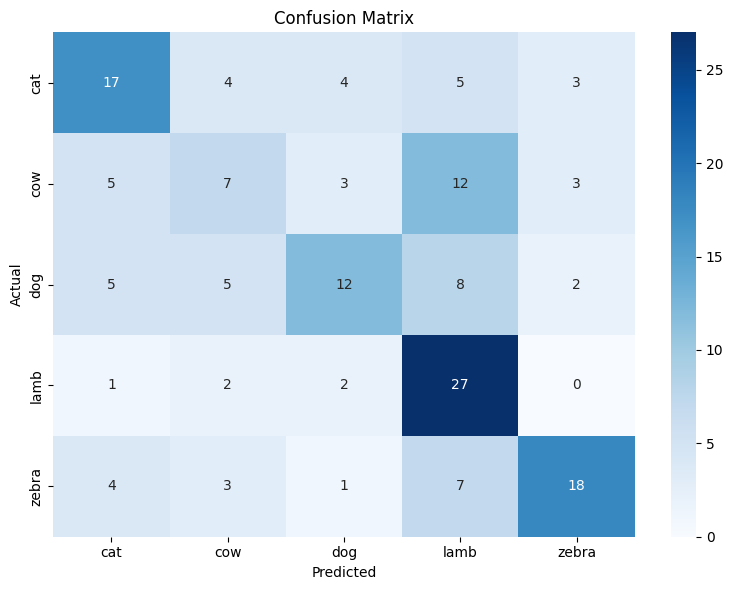

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [56]:
# Print metrics
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"✅ F1 Score: {f1:.2f}")
print("📄 Classification Report:\n", report)

✅ Accuracy: 50.62%
✅ F1 Score: 0.49
📄 Classification Report:
               precision    recall  f1-score   support

         cat       0.53      0.52      0.52        33
         cow       0.33      0.23      0.27        30
         dog       0.55      0.38      0.44        32
        lamb       0.46      0.84      0.59        32
       zebra       0.69      0.55      0.61        33

    accuracy                           0.51       160
   macro avg       0.51      0.50      0.49       160
weighted avg       0.52      0.51      0.49       160

